In [4]:
import os

In [33]:
with open('encrypted_text.txt', 'r') as file:
    encrypted_text = file.read()

print(encrypted_text)

ECRAI YEV TISRMMRMS KP SIK QIBW KRBIO PN VRKKRMS TW HIB VRVKIB PM KHI
TEML EMO PN HEQRMS MPKHRMS KP OP PMAI PB KYRAI VHI HEO GIIGIO RMKP KHI
TPPL HIB VRVKIB YEV BIEORMS TXK RK HEO MP GRAKXBIV PB APMQIBVEKRPMV RM
RK EMO YHEK RV KHI XVI PN E TPPL KHPXSHK ECRAI YRKHPXK GRAKXBIV PB
APMQIBVEKRPMV

VP VHI YEV APMVROIBRMS RM HIB PYM URMO EV YICC EV VHI APXCO NPB KHI
OEW UEOI HIB NIIC QIBW VCIIGW EMO VKXGRO YHIKHIB KHI GCIEVXBI PN
UELRMS E OERVWAHERM YPXCO TI YPBKH KHI KBPXTCI PN SIKKRMS XG EMO
GRALRMS KHI OERVRIV YHIM VXOOIMCW E YHRKI BETTRK YRKH GRML IWIV BEM
ACPVI TW HIB

KHIBI YEV MPKHRMS VP QIBW BIUEBLETCI RM KHEK MPB ORO ECRAI KHRML RK VP
QIBW UXAH PXK PN KHI YEW KP HIEB KHI BETTRK VEW KP RKVICN PH OIEB PH
OIEB R VHECC TI KPP CEKI TXK YHIM KHI BETTRK EAKXECCW KPPL E YEKAH
PXK PN RKV YERVKAPEKGPALIK EMO CPPLIO EK RK EMO KHIM HXBBRIO PM ECRAI
VKEBKIO KP HIB NIIK NPB RK NCEVHIO EABPVV HIB URMO KHEK VHI HEO MIQIB
TINPBI VIIM E BETTRK YRKH IRKHIB E YERVKAPEKGPALIK PB E YEKAH KP KELI
PXK PN RK

In [102]:
from collections import Counter
import string

def decrypt_caesar(ciphertext, shift):
    return ''.join(chr(((ord(char) - ord('A') - shift) % 26) + ord('A')) for char in ciphertext if char.isalpha())  # Only decrypt letters

def frequency_analysis(ciphertext):
    total = sum(char.isalpha() for char in ciphertext)
    freq = Counter(char for char in ciphertext if char.isalpha())
    normalized_freq = {char: count / total for char, count in freq.items()}
    sorted_freq = sorted(normalized_freq.items(), key=lambda x: x[1], reverse=True)
    print(sorted_freq)
    most_common_letters = 'ETAOINSHRDLCUMWFGYPBVKJXQZ'  # Most common English letters
    mapping = {char: most_common_letters[i] for i, (char, _) in enumerate(sorted_freq)}
    return mapping, sorted_freq

freq_mapping, sorted_freq = frequency_analysis(encrypted_text)
print(freq_mapping.items())

# Decrypt the text using the mapping
decrypted_text = ''.join(freq_mapping.get(char, char) for char in encrypted_text)
print(decrypted_text)


[('I', 0.1283111027616006), ('K', 0.09731354499342476), ('P', 0.08190869810257374), ('E', 0.07871501033251925), ('H', 0.06781889911703927), ('R', 0.06518880330640617), ('M', 0.06443734736051099), ('V', 0.060492203644561336), ('B', 0.05278978019913583), ('C', 0.04903250046965996), ('O', 0.0482810445237648), ('Y', 0.028931053916964117), ('X', 0.02461018222806688), ('N', 0.021792222430959986), ('S', 0.0214164944580124), ('A', 0.02085290249859102), ('T', 0.017095622769115162), ('W', 0.016719894796167575), ('G', 0.01634416682321999), ('U', 0.015592710877324816), ('L', 0.012399023107270337), ('Q', 0.007514559458951719), ('D', 0.0009393199323689649), ('Z', 0.0005635919594213789), ('J', 0.0005635919594213789), ('F', 0.00037572797294758596)]
dict_items([('I', 'E'), ('K', 'T'), ('P', 'A'), ('E', 'O'), ('H', 'I'), ('R', 'N'), ('M', 'S'), ('V', 'H'), ('B', 'R'), ('C', 'D'), ('O', 'L'), ('Y', 'C'), ('X', 'U'), ('N', 'M'), ('S', 'W'), ('A', 'F'), ('T', 'G'), ('W', 'Y'), ('G', 'P'), ('U', 'B'), ('L',

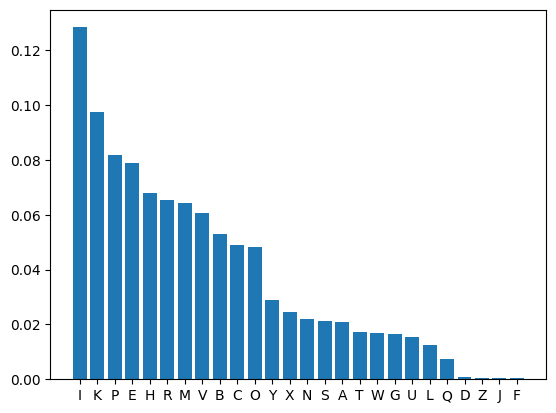

In [103]:
#plot the frequencies
import matplotlib.pyplot as plt

letters = [char for char, _ in sorted_freq]
frequencies = [freq for _, freq in sorted_freq]

plt.bar(letters, frequencies)
plt.show()



## Some analysis
Frequency analysis graph shows that there are some characters with so close frequencies so they are probably exchangeable for testing the frequencies

Such as `P & E` | `H & R & M & V`

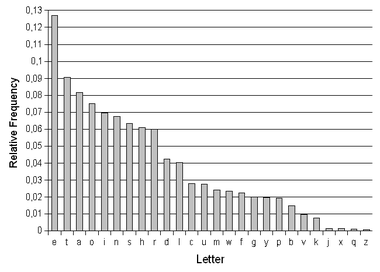


In [6]:
for i in range(1, 26):
    decrypted_text = ''.join(chr(((ord(char) - ord('A') + i) % 26) + ord('A')) if char != ' ' else ' ' for char in encrypted_text)
    print(f'{i}: {decrypted_text}')
    # print(f'{i}: {frequency_analysis(decrypted_text)}')

1: FDSBJ ZFW UJTSNNSNT LQ TJL RJCX LSCJP QO WSLLSNT UX IJC WSWLJC QN LIJYUFNM FNP QO IFRSNT NQLISNT LQ PQ QNBJ QC LZSBJ WIJ IFP HJJHJP SNLQ LIJYUQQM IJC WSWLJC ZFW CJFPSNT UYL SL IFP NQ HSBLYCJW QC BQNRJCWFLSQNW SNYSL FNP ZIFL SW LIJ YWJ QO F UQQM LIQYTIL FDSBJ ZSLIQYL HSBLYCJW QCYBQNRJCWFLSQNWYYWQ WIJ ZFW BQNWSPJCSNT SN IJC QZN VSNP FW ZJDD FW WIJ BQYDP OQC LIJYPFX VFPJ IJC OJJD RJCX WDJJHX FNP WLYHSP ZIJLIJC LIJ HDJFWYCJ QOYVFMSNT F PFSWXBIFSN ZQYDP UJ ZQCLI LIJ LCQYUDJ QO TJLLSNT YH FNPYHSBMSNT LIJ PFSWSJW ZIJN WYPPJNDX F ZISLJ CFUUSL ZSLI HSNM JXJW CFNYBDQWJ UX IJCYYLIJCJ ZFW NQLISNT WQ RJCX CJVFCMFUDJ SN LIFL NQC PSP FDSBJ LISNM SL WQYRJCX VYBI QYL QO LIJ ZFX LQ IJFC LIJ CFUUSL WFX LQ SLWJDO QI PJFC QIYPJFC S WIFDD UJ LQQ DFLJ UYL ZIJN LIJ CFUUSL FBLYFDDX LQQM F ZFLBIYQYL QO SLW ZFSWLBQFLHQBMJL FNP DQQMJP FL SL FNP LIJN IYCCSJP QN FDSBJYWLFCLJP LQ IJC OJJL OQC SL ODFWIJP FBCQWW IJC VSNP LIFL WIJ IFP NJRJCYUJOQCJ WJJN F CFUUSL ZSLI JSLIJC F ZFSWLBQFLHQBMJL QC F ZFLBI LQ LFMJYQYL QO

In [53]:
# from collections import Counter
# import string

# freq = Counter(char for char in encrypted_text if char != ' ')

# sorted_freq = sorted(freq.items(), key=lambda x: x[1], reverse=True)

# mapping = {}
# english_letters = 'ETAOINSHRDLCUMWFGYPBVKJXQZ'
# for i, (char, _) in enumerate(sorted_freq[:len(english_letters)]):
#     mapping[char] = english_letters[i]

# # Decrypt the text using the mapping
# decrypted_text = ''.join(mapping.get(char, char) for char in encrypted_text)

# print(decrypted_text)


In [55]:
# decrypted_text = ''.join(chr(((ord(char) - ord('A') + ord('C')) % 26) + ord('A')) if char != ' ' else ' ' for char in encrypted_text)


# decrypted_text

In [57]:
# #Vigenère decryption for the encrypted text
# def decrypt_vigenere(ciphertext, key):
#     key = key.upper()
#     key_length = len(key)
#     return ''.join(chr(((ord(char) - ord(key[i % key_length])) % 26) + ord('A')) if char.isalpha() else char for i, char in enumerate(ciphertext))


# key = 'DECIPHER'
# decrypted_text = decrypt_vigenere(encrypted_text, key)

# print(decrypted_text)
# # print(encrypted_text)

In [88]:
# monoalphabetic substitution cipher
def decrypt_monoalphabetic_substitution(ciphertext, mapping):
    return ''.join(mapping.get(char, char) for char in ciphertext)

mapping = {'A': 'E', 'B': 'T', 'C': 'A', 'D': 'O', 'E': 'I', 'F': 'N', 'G': 'S', 'H': 'H', 'I': 'R', 'J': 'D', 'K': 'L', 'L': 'C', 'M': 'U', 'N': 'M', 'O': 'W', 'P': 'F', 'Q': 'G', 'R': 'Y', 'S': 'P', 'T': 'B', 'U': 'V', 'V': 'K', 'W': 'J', 'X': 'X', 'Y': 'Q', 'Z': 'Z'}
mapping2 = {v: k for k, v in mapping.items()}  # Invert the mapping
mapping2['K'] = 'T'
mapping2['B'] = 'R'
mapping2['P'] = 'O'
mapping2['Y'] = 'W'
mapping2['V'] = 'S'
mapping2['Q'] = 'V'
mapping2['W'] = 'Y'
mapping2['G'] = 'P'
mapping2['X'] = 'U'
mapping2['F'] = 'Q'
mapping2['J'] = 'X'
decrypted_text = decrypt_monoalphabetic_substitution(encrypted_text, mapping2)

print(decrypted_text)    

ALICE WAS BEGINNING TO GET VERY TIRED OF SITTING BY HER SISTER ON THE
BANK AND OF HAVING NOTHING TO DO ONCE OR TWICE SHE HAD PEEPED INTO THE
BOOK HER SISTER WAS READING BUT IT HAD NO PICTURES OR CONVERSATIONS IN
IT AND WHAT IS THE USE OF A BOOK THOUGHT ALICE WITHOUT PICTURES OR
CONVERSATIONS

SO SHE WAS CONSIDERING IN HER OWN MIND AS WELL AS SHE COULD FOR THE
DAY MADE HER FEEL VERY SLEEPY AND STUPID WHETHER THE PLEASURE OF
MAKING A DAISYCHAIN WOULD BE WORTH THE TROUBLE OF GETTING UP AND
PICKING THE DAISIES WHEN SUDDENLY A WHITE RABBIT WITH PINK EYES RAN
CLOSE BY HER

THERE WAS NOTHING SO VERY REMARKABLE IN THAT NOR DID ALICE THINK IT SO
VERY MUCH OUT OF THE WAY TO HEAR THE RABBIT SAY TO ITSELF OH DEAR OH
DEAR I SHALL BE TOO LATE BUT WHEN THE RABBIT ACTUALLY TOOK A WATCH
OUT OF ITS WAISTCOATPOCKET AND LOOKED AT IT AND THEN HURRIED ON ALICE
STARTED TO HER FEET FOR IT FLASHED ACROSS HER MIND THAT SHE HAD NEVER
BEFORE SEEN A RABBIT WITH EITHER A WAISTCOATPOCKET OR A WATCH TO TAKE
OUT OF IT

In [97]:
mapping = dict(freq_mapping)
print(mapping)

mapping['P'] = 'O'
mapping['E'] = 'A'

mapping['H'] = 'H'
mapping['R'] = 'I'
mapping['M'] = 'N'
mapping['V'] = 'S'

mapping['C'] = 'L'
mapping['O'] = 'D'


decrypted_text = decrypt_monoalphabetic_substitution(encrypted_text, mapping)

print(decrypted_text)    

{'I': 'E', 'K': 'T', 'P': 'A', 'E': 'O', 'H': 'I', 'R': 'N', 'M': 'S', 'V': 'H', 'B': 'R', 'C': 'D', 'O': 'L', 'Y': 'C', 'X': 'U', 'N': 'M', 'S': 'W', 'A': 'F', 'T': 'G', 'W': 'Y', 'G': 'P', 'U': 'B', 'L': 'V', 'Q': 'K', 'D': 'J', 'Z': 'X', 'J': 'Q', 'F': 'Z'}
ALIFE CAS GEWINNINW TO WET KERY TIRED OM SITTINW GY HER SISTER ON THE
GANV AND OM HAKINW NOTHINW TO DO ONFE OR TCIFE SHE HAD PEEPED INTO THE
GOOV HER SISTER CAS READINW GUT IT HAD NO PIFTURES OR FONKERSATIONS IN
IT AND CHAT IS THE USE OM A GOOV THOUWHT ALIFE CITHOUT PIFTURES OR
FONKERSATIONS

SO SHE CAS FONSIDERINW IN HER OCN BIND AS CELL AS SHE FOULD MOR THE
DAY BADE HER MEEL KERY SLEEPY AND STUPID CHETHER THE PLEASURE OM
BAVINW A DAISYFHAIN COULD GE CORTH THE TROUGLE OM WETTINW UP AND
PIFVINW THE DAISIES CHEN SUDDENLY A CHITE RAGGIT CITH PINV EYES RAN
FLOSE GY HER

THERE CAS NOTHINW SO KERY REBARVAGLE IN THAT NOR DID ALIFE THINV IT SO
KERY BUFH OUT OM THE CAY TO HEAR THE RAGGIT SAY TO ITSELM OH DEAR OH
DEAR I SHALL GE TOO LATE 

In [32]:
# Subtract enc from dec to get statistics of the difference
diff = ''.join(chr(((ord(char) - ord(encrypted_text[i])) % 26) + ord('A')) if char.isalpha() else char for i, char in enumerate(decrypted_text))
print("mod26(Encrypted Text - Decrypted Text):\n")
print(diff)

mod26(Encrypted Text - Decrypted Text):

WJRCW YWX IWORBBRBO JZ OWJ FWQC JRQWP ZS XRJJRBO IC AWQ XRXJWQ ZB JAW
IWBZ WBP ZS AWFRBO BZJARBO JZ PZ ZBCW ZQ JYRCW XAW AWP JWWJWP RBJZ JAW
IZZZ AWQ XRXJWQ YWX QWWPRBO IXJ RJ AWP BZ JRCJXQWX ZQ CZBFWQXWJRZBX RB
RJ WBP YAWJ RX JAW XXW ZS W IZZZ JAZXOAJ WJRCW YRJAZXJ JRCJXQWX ZQ
CZBFWQXWJRZBX

XZ XAW YWX CZBXRPWQRBO RB AWQ ZYB SRBP WX YWJJ WX XAW CZXJP SZQ JAW
PWC SWPW AWQ SWWJ FWQC XJWWJC WBP XJXJRP YAWJAWQ JAW JJWWXXQW ZS
SWZRBO W PWRXCCAWRB YZXJP IW YZQJA JAW JQZXIJW ZS OWJJRBO XJ WBP
JRCZRBO JAW PWRXRWX YAWB XXPPWBJC W YARJW QWIIRJ YRJA JRBZ WCWX QWB
CJZXW IC AWQ

JAWQW YWX BZJARBO XZ FWQC QWSWQZWIJW RB JAWJ BZQ PRP WJRCW JARBZ RJ XZ
FWQC SXCA ZXJ ZS JAW YWC JZ AWWQ JAW QWIIRJ XWC JZ RJXWJS ZA PWWQ ZA
PWWQ R XAWJJ IW JZZ JWJW IXJ YAWB JAW QWIIRJ WCJXWJJC JZZZ W YWJCA
ZXJ ZS RJX YWRXJCZWJJZCZWJ WBP JZZZWP WJ RJ WBP JAWB AXQQRWP ZB WJRCW
XJWQJWP JZ AWQ SWWJ SZQ RJ SJWXAWP WCQZXX AWQ SRBP JAWJ XAW AWP BWFWQ
IWSZQW XWWB W QWIIRJ YRJA WRJAWQ W YWR

In [75]:
# print(mapping2)
print("Decryption Mapping:")
# print("\n".join(f"{k} -> {v} : {ord(k) - ord(v)}" for k,v in sorted(mapping2.items())))
print("\n".join(f"{k} -> {v} : {ord(k) - ord(v)}" for k,v in mapping2.items()))


Decryption Mapping:
E -> A : 4
T -> B : 18
A -> C : -2
O -> D : 11
I -> E : 4
N -> F : 8
S -> G : 12
H -> H : 0
R -> I : 9
D -> J : -6
L -> K : 1
C -> L : -9
U -> M : 8
M -> N : -1
W -> Y : -2
F -> Q : -11
G -> P : -9
Y -> W : 2
P -> O : 1
B -> R : -16
V -> S : 3
K -> T : -9
J -> X : -14
X -> U : 3
Q -> V : -5
Z -> Z : 0


In [22]:
with open('decrypted_text.txt', 'w') as file:
    file.write(decrypted_text)